In [131]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

Open file and process data into correct type:

In [132]:
raw_data = open("entropy_data.txt","r")
raw_data = raw_data.read().split(",")
# there is a blank value at the end therefore remove it
raw_data.pop()

processed_data = []
for i in range(len(raw_data)):
    processed_data.append(float(raw_data[i]))

Split data into 2 separate lists:

In [133]:
distance, entropy = [], []
for i in range(len(processed_data)):
    if i == 0 or i%2 == 0:
        entropy.append(processed_data[i])
    else:
        distance.append(processed_data[i])

Plot entropy against distance:

Text(0.5, 1.0, 'Plot of entropy against distance')

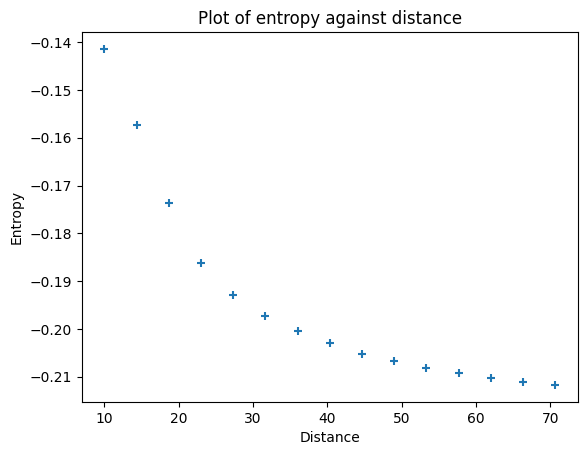

In [134]:
plt.scatter(distance,entropy,marker='+')
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Plot of entropy against distance")

Plot gradient against distance:

In [135]:
x_values,y_values = [],[]
for i in range(0,len(processed_data),2):
    x_values.append(processed_data[i+1])
    y_values.append(processed_data[i])

In [136]:
p = np.polyfit(x_values,y_values,3)
p

array([-7.63439623e-07,  1.21854342e-04, -6.58102462e-03, -8.73660093e-02])

Text(0.5, 1.0, 'Fitting a polynomial curve')

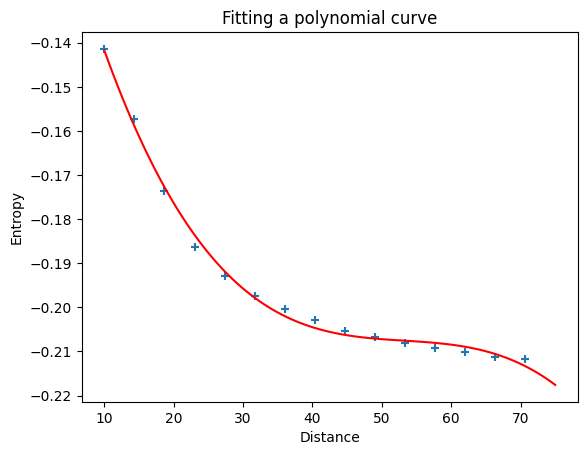

In [137]:
x = np.linspace(10,75,100)
y = (p[0] * x**3) + (p[1] * x**2) + (p[2] * x) + p[3]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y,"red")
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Fitting a polynomial curve")

In [138]:
def f(x, a, b, c):
    return (a*(x**b)) + c

p2 = scipy.optimize.curve_fit(f, xdata=x_values,ydata=y_values, p0=(0,-1,2))
p2 = p2[0]
p2

array([ 0.60827711, -0.81375269, -0.23214814])

Text(0.5, 1.0, 'Fitting an exponential curve')

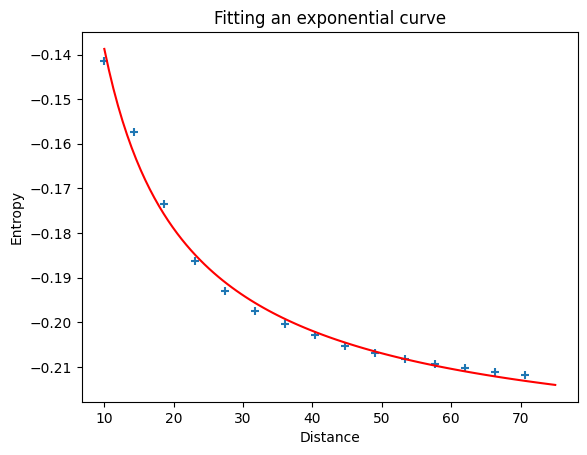

In [139]:
y2 = (p2[0] * (x**p2[1])) + p2[2]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y2,"red")
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Fitting an exponential curve")

Calculate gradient between points and graph

In [140]:
gradient_vals = []

for i in range(len(entropy)-1):
    dS = entropy[i+1] - entropy[i]
    dx = distance[i+1] - distance[i]
    x = distance[i] + dx/2
    gradient_vals.append((dS/dx,x))


Text(0.5, 1.0, 'Plotting dS/dx against distance(x)')

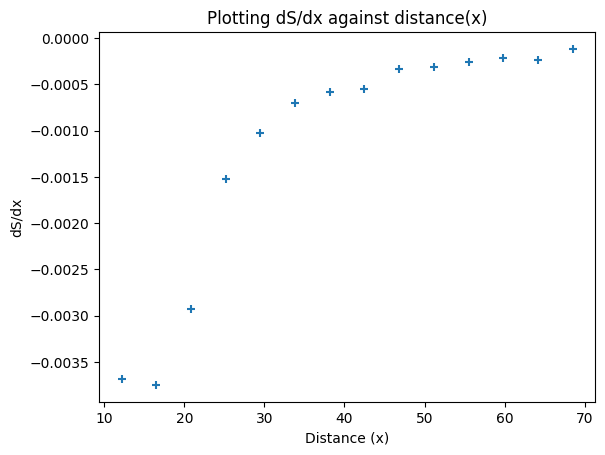

In [141]:
grad_xs, grad_ys = [],[]
for coord in gradient_vals:
    grad_ys.append(coord[0])
    grad_xs.append(coord[1])

plt.scatter(grad_xs,grad_ys,marker="+")
plt.xlabel("Distance (x)")
plt.ylabel("dS/dx")
plt.title("Plotting dS/dx against distance(x)")

[ 0.00231957 -0.00946685]
[-0.0036705938546311087, -0.0029642631105258515, -0.0024235583879540033, -0.001984865752971185, -0.001616525348832264, -0.0012987398918055826, -0.0010189577823447003, -0.0007696193851142348, -0.0005445008174136227, -0.0003390612768981848, -0.00015057578235222815, 2.37379577525329e-05, 0.00018606162526025281, 0.000337578780740087]


Text(0.5, 1.0, 'Fitting a log curve to the data')

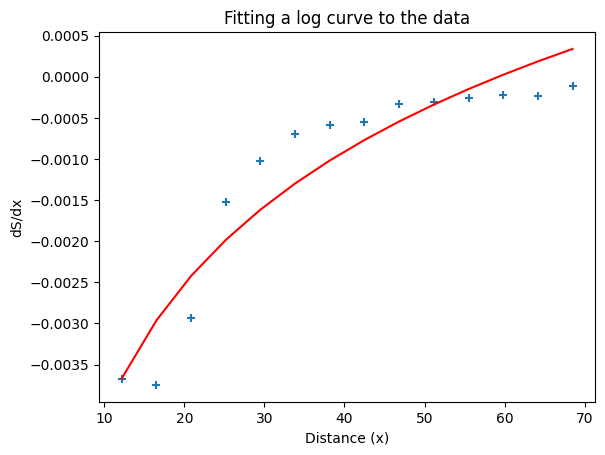

In [142]:
def f(x, a, b):
    return a * np.log(x) + b

p3 = scipy.optimize.curve_fit(f, xdata=grad_xs,ydata=grad_ys, p0=(0.01, 0.05))[0]

print(p3)
y3 = []
for grad_x in grad_xs:
    y3.append(p3[0] * np.log(grad_x) + p3[1])
print(y3)


plt.plot(grad_xs,y3,"red")
plt.scatter(grad_xs,grad_ys,marker="+")
plt.xlabel("Distance (x)")
plt.ylabel("dS/dx")
plt.title("Fitting a log curve to the data")

In [143]:
neg_log_grads = []
log_xs = []

for y in grad_ys:
    neg_log_grads.append(np.log(-1 * y))
for x in grad_xs:
    log_xs.append(np.log(x))

Text(0.5, 1.0, 'ln-ln plot of data')

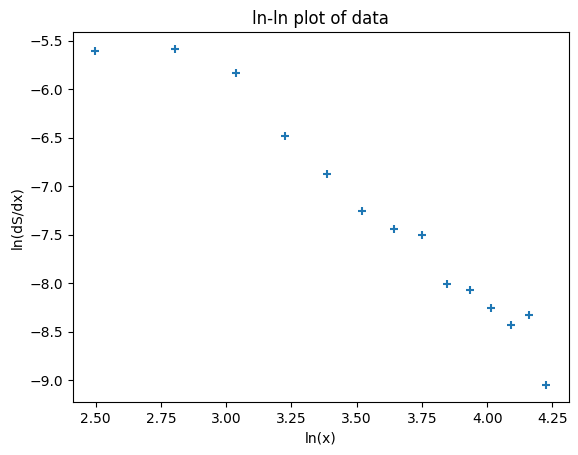

In [144]:
plt.scatter(log_xs,neg_log_grads,marker="+")
plt.xlabel("ln(x)")
plt.ylabel("ln(dS/dx)")
plt.title("ln-ln plot of data")

In [145]:
p4 = np.polyfit(log_xs,neg_log_grads,1)
p4

array([-2.06143729,  0.04352255])

Text(0.5, 1.0, 'Plotting linear LOBF')

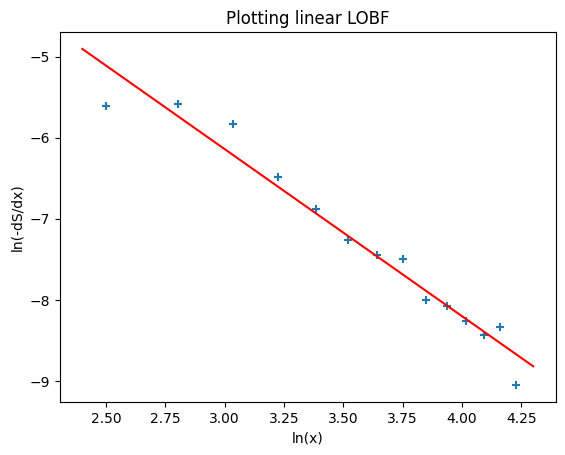

In [146]:
x = np.linspace(2.4,4.3,100)
y = p4[0] * x + p4[1]

plt.scatter(log_xs,neg_log_grads,marker="+")
plt.plot(x,y,"red")
plt.xlabel("ln(x)")
plt.ylabel("ln(-dS/dx)")
plt.title("Plotting linear LOBF")

In [147]:
print("The gradient of the ln-ln plot is %s"%round(p4[0],9))

The gradient of the ln-ln plot is -2.061437293


# Ideas:

Graph multiple datasets or their LOBFs, calculate mean or median of them

Graph how long varying number of simulations (fix num_chords) takes as well as varying number of chords (fixed num_tests)